# COGS 108 - Final Project 

# Overview

In this project I will examine the effects of a restaurant's general location on its health inspection score. From what we know about implicit bias, it is possible that the wealth of the neighborhood a restaurant is located in has a measurable effect on the score it will receive on a health inspection. The result of this analysis is that for Wake County, North Carolina, the neighborhood surrounding a restaurant on average does not have a significant effect on the health inspection score that restaurant will receive.

# Name & GitHub

- Name: Bennett Wells
- GitHub Username: bdwells

# Research Question

What is the relationship between a restaurant's neighborhood and its health inspection rating?

## Background and Prior Work

   Throughout every area of everyday life, decisions are being made. Most of the time, people believe they are making these decisions autonomously, but forces out of their control such as implicit bias and other socioeconomic prejudices can cloud anyone's judgement. Implicit bias is caused by our own tendencies to seek patterns and take shortcuts, or from outside societal pressures. Its effects are felt in schools, healthcare settings, and workplaces across the country.
   
   When taking a look at health inspections, a government study in 2017 in Philadelphia showed that for restaruats in areas with a higher proportion of black residents, there were increased numbers of mean good retail practice violations per inspection. This indicates that is possible that implicit bias and other predispositions are effecting the health inspection process.

References:
- 1) How Does Implicit Bias Influence Behavior? https://www.verywellmind.com/implicit-bias-overview-4178401
- 2) Inspection Frequency, Sociodemographic Factors, and Food Safety Violations in Chain and Nonchain Restaurants https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5349477/

# Hypothesis


On average, restaurants in areas of increased diversity and/or lower socioeconomic status will on average receive lower health inspection ratings.

# Dataset(s)

To answer this question, I will used data collected about health inspections from Wake county in North Carolina, as well as information regarding the zipcodes within the county. The health inspection data contains all health inspections done from September 2012 to November 2016, the most important of which is the score from the inspection. The zipcode data contains information regarding the financial affluence of the zipcode, such as household income and poverty percentage, as well as information regarding the diversity of the zipcode in terms of the percentage of the population that is not white. I will combine them by taking the average of the health inspection scores in each zipcode and combining those averages with the data about each zipcode. 

Dataset Name: zipcodes.csv

Number of observations: 39


Dataset Name: inspections.csv

Number of observations: 18467


# Setup

For setup, I am using the typical data analysis packages: Numpy, Pandas, MatPlotLib, and SciPy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats

# Data Cleaning

The provided data is rather clean. The zipcode data is all clearly labeled and uniformly formatted across all entries. The inspection zipcode data is almost uniform. Some zipcodes include the full 9 digit zipcode, when all we need for averaging and analysis is the 5 digit zipcode. 

To get the data into a usable format first, I read in the zipcode data and the inspections data.

In [2]:
zipcodes_df = pd.read_csv('zipcodes.csv')
inspections_df = pd.read_csv('inspections.csv')

Because my goal is to explore how inspection scores might change based on the location, I create another dataframe to store the relevant information: the inspection scores and the zipcodes. Some of the zipcodes were entered with the last 4 digits corresponding to a specific delivery route, but because that information isn't relevant for this analysis, I took the zipcodes to only be the first five digits when copying it over.

In [3]:
score_df = pd.DataFrame()
score_df['zip'] = inspections_df['postalcode'].str[:5]
score_df['score'] = inspections_df['score']

Next is averaging the scores by zipcode. I stored this data in a final dataframe that will be added to and used for analysis.

In [4]:
df = score_df.groupby('zip',as_index=False)['score'].mean()

The last thing to do is merge the two data sets: zipcodes and scores, then rename columns and drop columns of data that isn't relevant to the analysis. Also because there were some zipcodes that had inspections and scores but no data was collected about them from the zipcodes file, those rows need to be dropped.

In [5]:
zipcodes_df['zip'] = zipcodes_df['zip'].astype(str)
df = df.merge(zipcodes_df,how='left')
df = df.rename(columns={"median_family_income_dollars":"family_income","median_household_income_dollars":"house_income","per_capita_income_dollars":"capita_income","percent_damilies_below_poverty_line":"poverty_perc","percent_snap_benefits":"snap","percent_supplemental_security_income":"supp","percent_nonwhite":"nonwhite_perc"})
df = df.drop(columns=['supp','snap'])
df = df.dropna(axis=0)
df.head()

,zip,score,family_income,house_income,capita_income,poverty_perc,nonwhite_perc
0,27501,94.750000,59408.0,51121.0,21631.0,10.5,17.9
1,27502,96.367223,109891.0,95857.0,36763.0,3.4,18.9
2,27511,96.418969,82292.0,67392.0,33139.0,9.6,24.8
4,27513,95.655130,109736.0,87262.0,41232.0,3.8,27.8
5,27518,97.225291,125432.0,98247.0,49865.0,5.5,19.9


# Data Analysis & Results

### EDA

The most relevant variable to check the distribution of is the scores variable. Here is a histogram of that variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5831ea18d0>]],
      dtype=object)

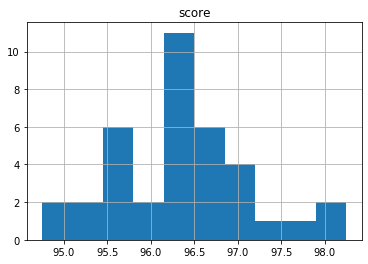

In [6]:
df.hist(column='score')

To test whether the distribution is normal or not, use ScyPi and the normaltest function.

In [7]:
[statistic,pvalue] = stats.normaltest(df['score'])
pvalue

0.6516299344706591

This test shows that the scores variable cannot be concluded to be normally distributed because the p value is greater than 0.05

There is one significant outlier in the poverty percentage. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f582fd59b38>]],
      dtype=object)

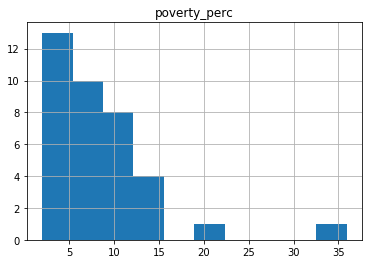

In [8]:
df.hist('poverty_perc')

In [9]:
display(df[df['poverty_perc']>30])

,zip,score,family_income,house_income,capita_income,poverty_perc,nonwhite_perc
26,27601,96.0237,28641.0,27564.0,17363.0,35.9,69.9


This zipcode corresponds to downtown Raleigh. Because this is the downtown area of the biggest city in North Carolina, the higher poverty percentage is somewhat to be expected. Inner cities around the country typically have higher poverty percentages than nearby surrounding areas. The high average score for this zip code is an early indication that the results of these health inspections may not be tied to the economic prosperity of the area.

### Analysis

To analyze the effect of each variable on the inspection scores, I'll use ScyPi to get a linear regression and an r value for the scatterplot of each variable.

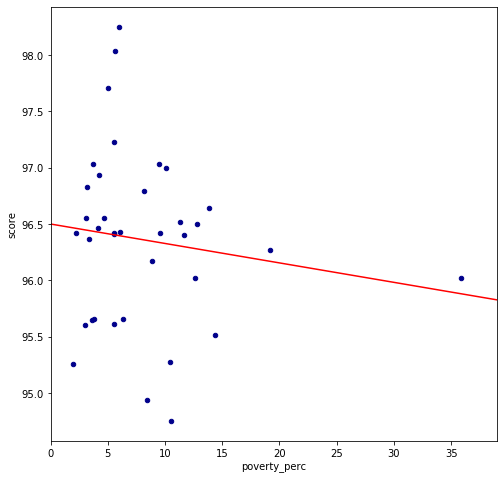

In [10]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['poverty_perc'],df['score'])
r_value = r_value*r_value
rSquared = {'poverty_perc':r_value}

df.plot.scatter('poverty_perc', 'score', figsize=[8,8], c='DarkBlue')
df_povScore = pd.DataFrame()
df_povScore['score'] = slope*np.arange(0,40)+intercept
df_povScore['poverty_perc'] = np.arange(0,40)
df_povScore.set_index('poverty_perc').score.plot(color='red')

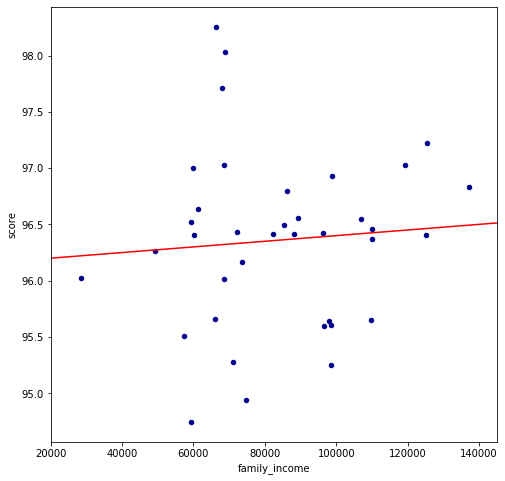

In [11]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['family_income'],df['score'])
r_value = r_value*r_value
rSquared['family_income']=r_value 

df.plot.scatter('family_income','score',figsize=[8,8],c='DarkBlue')
df_povScore = pd.DataFrame()
df_povScore['score'] = slope*np.arange(20000,145000)+intercept
df_povScore['family_income'] = np.arange(20000,145000)
df_povScore.set_index('family_income').score.plot(color='red')

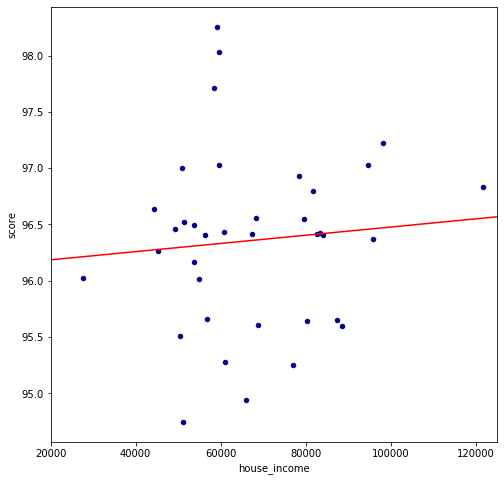

In [12]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['house_income'],df['score'])
r_value = r_value*r_value
rSquared['house_income']=r_value

df.plot.scatter('house_income','score',figsize=[8,8],c='DarkBlue')
df_povScore = pd.DataFrame()
df_povScore['score'] = slope*np.arange(20000,125000)+intercept
df_povScore['house_income'] = np.arange(20000,125000)
df_povScore.set_index('house_income').score.plot(color='red')

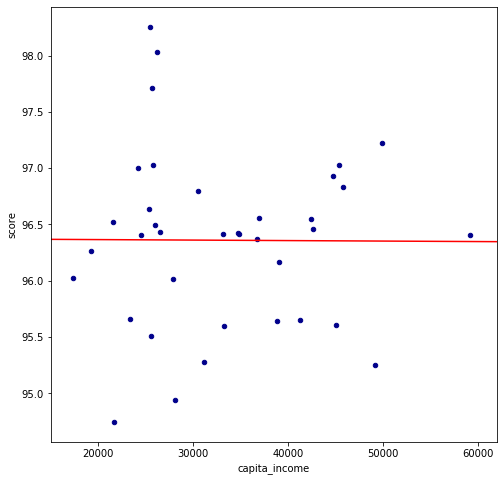

In [13]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['capita_income'],df['score'])
r_value = r_value*r_value
rSquared['capita_income'] = r_value

df.plot.scatter('capita_income','score',figsize=[8,8],c='DarkBlue')
df_povScore = pd.DataFrame()
df_povScore['score'] = slope*np.arange(15000,62000)+intercept
df_povScore['capita_income'] = np.arange(15000,62000)
df_povScore.set_index('capita_income').score.plot(color='red')

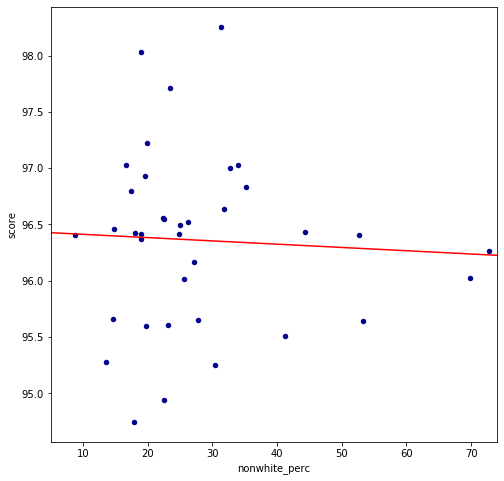

In [14]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['nonwhite_perc'],df['score'])
r_value = r_value*r_value
rSquared['nonwhite_perc'] = r_value

df.plot.scatter('nonwhite_perc','score',figsize=[8,8],c='DarkBlue')
df_povScore = pd.DataFrame()
df_povScore['score'] = slope*np.arange(5,75)+intercept
df_povScore['nonwhite_perc'] = np.arange(5,75)
df_povScore.set_index('nonwhite_perc').score.plot(color='red')

The distribution for the inspection scores as a function of each variable looks pretty random. Let's take a look at the r-squared values

In [15]:
display("Family Income vs Score R^2: ", rSquared['family_income'])
display("Household Income vs Score R^2: ", rSquared["house_income"])
display("Per-capita Income vs Score R^2: ", rSquared['capita_income'])
display("Poverty Percentage vs Score R^2: ", rSquared['poverty_perc'])
display("Non-White Percentage vs Score R^2: ", rSquared['nonwhite_perc'])

'Family Income vs Score R^2: '

0.006066518275830749

'Household Income vs Score R^2: '

0.007852453354502138

'Per-capita Income vs Score R^2: '

3.149933046988052e-05

'Poverty Percentage vs Score R^2: '

0.01880504348956497

'Non-White Percentage vs Score R^2: '

0.002941687538674025

The R^2 is a measurement of how well the regression fits the model. It is the variance explained by the model divided by the total variance. If the model captures the variance of the relationship, the R-squared value would be close to 1, or 100%. For the relations shown above, the R-squared values never explain more than 2% of the variance in the distribution, meaning that the relationship between the dependent and independant variables is not very linear. This conclusion can also be reached by examining the scatter plots. 

# Ethics & Privacy

I did have authorization to use this data, just as anyone would. Information regarding health inspections as well as information about Wake county's demographics are available to the public. Because no specific restaurant's are named in the analysis, there is no worry about violating any coporate or individual privacy in analyzing the data. The results of this analysis should not be extrapolated to the United States as a whole, because the data had only one source: Wake County. Because the conclusion of the analysis was that the models weren't indicative of anything statistically significant, unintended use of the model poses little threat. 

# Conclusion & Discussion

The goal of this project was to examine the effects of socioeconomic status and racial diversity on the scores of health inspections. To do this I used data from Wake County in North Carolina about inspection scores from 2012 to 2016 as well as data about the demographics and monitary affluence of each zipcode within the county. When examined, the average scores within each of the zipcodes did not demonstrate a significant relationship to the socioeconomic status or the racial diversity within the area. My analysis is not without flaws. Averaging by zipcode took a lot of information out of the consideration, though the scope was limited to begin with. With only 39 unique zipcodes to work with, there are possible relationships between variables that got overlooked because the sample size was simply too small. 

This analysis does not mean that socioeconomic factors and racial diversity do not influence the health inspection process. Given more time, I would have liked to examine the effects of these factors on the violation rate of health inspections, as the scores themselves may not tell the entire story. What can be concluded from this study is that within Wake County, there seems to be on average no significant relationship between what part of town a restaurant is located in and its health inspection score. The score is likely much more heavily impacted by other measures, such as the cleanliness of the restaurant and the saftey procautions taken when preparing food. For the sake of our public safety, hopefully these are the factors that continue to drive the health inspection process. 